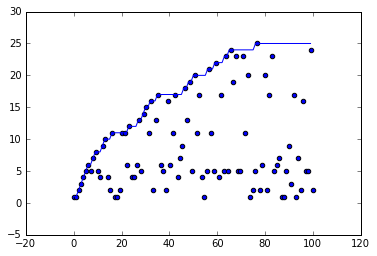

In [2]:
# DP sampling with CRP
# Fully influenced by Yee Whye Teh (http://www.stats.ox.ac.uk/~teh/npbayes.html)

import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

alpha = 10 # DP Parameter
num_guest = 100 # Number of Guest at Chinese Restaurnat

num_per_table = [1] # number of customer for each table
prob_per_guest = [] # probability of cutomer to sit for each able
guest_allocation = np.zeros(num_guest) # allocated table for each guest
guest_allocation[0] = 1 # First Customer sit at zero-th Table
num_allocated_table = np.zeros(num_guest) # number of table when i-th guest arrive and are allocated
num_allocated_table[0] = 1 # First Customer sit at zero-th Table
num_table = 0 # allocated table

for guest in range(1,num_guest):
    prob_per_guest = num_per_table[:]
    prob_per_guest.append(alpha)
    random_number = np.random.uniform(0,1)
    # Sampling based on the probaiblity [number of guest for each table , alpha]
    guest_allocation[guest] = sum([1 for itr in range(len(np.cumsum(prob_per_guest))) if  random_number*sum(prob_per_guest) > np.cumsum(prob_per_guest)[itr] ])

    if guest_allocation[guest] <=  num_table:
        num_per_table[int(guest_allocation[guest])] = num_per_table[int(guest_allocation[guest])] + 1
    else:
        num_per_table.append(1)
        num_table = num_table + 1
    num_allocated_table[guest] = num_table

plt.plot(num_allocated_table)
plt.scatter(np.linspace(0,num_guest,num=num_guest-1+1),guest_allocation)
plt.show()
        
    
    